<img src="img/banniere.jpg" />

## Imports
### 1.1 import des bibliothèques

In [1]:
# builtin
import os

# data
import pandas as pd
import numpy as np

# preprocessing et metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#Modele selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Visualisation
import matplotlib.pyplot as plt

# options 
import warnings
warnings.filterwarnings('ignore')

### 1.2 Import des données

In [2]:
# import donnees
df = pd.read_csv("datas/billets_complet.csv", sep = ',')
# df.head()

## 2 First Tour
### Display

In [3]:
df.head() # premières lignes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df.tail() # dernières lignes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [5]:
df.sample(5) # 5 ligne au hasard

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
31,True,171.98,104.33,103.61,3.68,3.14,113.41
1245,False,172.26,104.04,104.43,3.82,3.47,111.95
1073,False,172.13,103.67,103.82,4.27,3.22,112.15
704,True,171.75,103.60,103.40,4.02,2.84,112.90
353,True,172.21,103.80,103.23,3.70,2.98,112.95


### 2.2  Structure

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df.dtypes.value_counts()

float64    6
bool       1
dtype: int64

In [8]:
df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      316
margin_up       123
length          336
dtype: int64

- Colonne, is_genuine, ne comporte qu 2 valeurs unique ==> c'est bien une question de classification. C'est notre "target"
- Notre **target** : "is_genuine" est bien un booleen 
### Nan et duplicated

In [9]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 2.3 Data Inspection

In [11]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [12]:
df.iloc[:,0].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

In [13]:
df.iloc[:,0].value_counts(normalize = True).round(2)

True     0.67
False    0.33
Name: is_genuine, dtype: float64

<AxesSubplot:ylabel='is_genuine'>

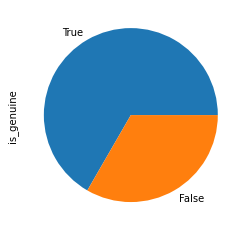

In [14]:
df.iloc[:,0].value_counts().plot(kind="pie")

- Le df est constitué de : 
    - 67% de données étiquette True
    - 33% de données étiquette Fase

## 3 Cleaning
### 3.1 Label encoding

In [15]:
df.is_genuine = LabelEncoder().fit_transform(df['is_genuine'])

In [16]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [18]:
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### 3.2 Rename is_genuine in target

In [19]:
df = df.rename(columns={"is_genuine":"target"})
df.head()

,target,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


## 4. Data preparation
### 4.1 X & y


In [20]:
X = df.drop(columns='target')
y = df.target

In [21]:
X.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 4.2 Test train split

In [23]:
X_train, X_test,y_train, y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.3,
                                                  random_state=42)

In [24]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
print(f"Nous avons X_train de forme{X_train.shape} et y_train de forme {y_train.shape} ")
print(f"Nous avons X_test de forme{X_test.shape} et y_train de forme {y_test.shape} ")


Nous avons X_train de forme(1050, 6) et y_train de forme (1050,) 
Nous avons X_test de forme(450, 6) et y_train de forme (450,) 


## 5 Modelisation
### 5.1 Dummy classifier
sert à evaluer notre futur model

In [26]:
estimator = DummyClassifier(strategy="most_frequent")
estimator.fit(X_train_scaled,y_train)

DummyClassifier(strategy='most_frequent')

In [27]:
# On lance la prédiction
# il n'a que des 1 puisque 2/3 des billets sont True = 1 = vrai billets
y_pred = estimator.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [28]:
pd.Series(y_pred).value_counts()

1    450
dtype: int64

In [29]:
# La valeur 1 est la plus présente
y_test.value_counts(normalize=True)

1    0.642222
0    0.357778
Name: target, dtype: float64

In [30]:
y_test.values

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [31]:
# On calcule les scores
# tr : performance sur les données de train
# te : performance sur les données de test
tr_score = estimator.score(X_train, y_train).round(4)
te_score = estimator.score(X_test, y_test).round(4)
print(f'Score train : {tr_score} score test : {te_score}')

Score train : 0.6771 score test : 0.6422


- Nos données peuvent donc fonctionner dans le cadre d'une modélisation
- **Notre modélisation fonctionne avec notre algorithme naïf et nous donne des scores de base pour estimer les prochain algo.**
- On a un score de base : l'estimateur naïf, le plus simple possible nous renvoie un accuracy score de 0.6 ==> améliration de notre modele ==> > 0.6 et <=1
    - Si accuracy score = 1 : le modele prédit le contraire du resultat attendu

In [32]:
# On l'utilisera souvent ==> on fait une fonction
def score(estimator):
    """compute and print trai score an test score"""
    
    tr_score = estimator.score(X_train, y_train).round(4) # accuracy score : nombre de bonne prediction
    te_score = estimator.score(X_test, y_test).round(4)
    print(f'Score train : {tr_score} score test : {te_score}')

In [33]:
# On test la fonction
score(estimator)

Score train : 0.6771 score test : 0.6422


In [34]:
pd.Series(y_train).value_counts(normalize=True).round(4)

1    0.6771
0    0.3229
Name: target, dtype: float64

In [35]:
pd.Series(y_test).value_counts(normalize=True).round(4)

1    0.6422
0    0.3578
Name: target, dtype: float64

### 5.2 Matrice de confusion 

In [36]:
# Matrice de confusion
mat = confusion_matrix(y_test, y_pred)
mat

array([[  0, 161],
       [  0, 289]], dtype=int64)

In [37]:
mat = pd.DataFrame(mat)

In [38]:
mat = pd.DataFrame(mat)
mat.columns = [f"pred_{i}" for i in mat.columns]
mat.index = [f"test_{i}" for i in mat.index]
mat

,pred_0,pred_1
test_0,0,161
test_1,0,289


In [39]:
# On crée une fonction confusion
def confusion(y_test, y_pred):
    """display a fancy confusion matrix""" 
    mat = confusion_matrix(y_test,y_pred)
    mat = pd.DataFrame(mat)
    mat.columns = [f"pred_{i}" for i in mat.columns]
    mat.index = [f"test_{i}" for i in mat.index]
    
    return mat 

In [40]:
confusion(y_test,y_pred)

,pred_0,pred_1
test_0,0,161
test_1,0,289


### 5.3 Courbe ROC, précision, rappel

In [41]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

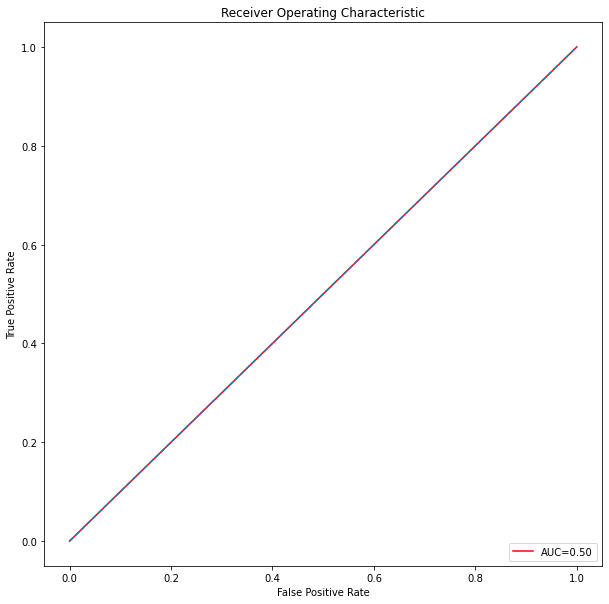

In [42]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [43]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall   : %.3f' % recall_score(y_test, y_pred))
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score : %.3f' % f1_score(y_test, y_pred))

Precision: 0.642
Recall   : 1.000
Accuracy : 0.642
F1 Score : 0.782


# 6. Régression Logistique

## 6.1 Logistic Regression

In [44]:
# On instancie un estimateur avec un soleur
estimator = LogisticRegression(solver="liblinear")
# On l'entraine
estimator.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [45]:
# On entraine notre estimateur
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [46]:
y_prob = estimator.predict_proba(X_test).round(2)
# Vecteur de probabilté d'appartenir à une classe
y_prob

array([[1.  , 0.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.16, 0.84],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.49, 0.51],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.59, 0.41],
       [0.99, 0.01],
       [0.05, 0.95],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.98, 0.02],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.01,

### 6.2 Matrice de confusion 

In [47]:
score(estimator)
confusion(y_test,y_pred)

Score train : 0.9914 score test : 0.9867


,pred_0,pred_1
test_0,156,5
test_1,1,288


**Les scores sont meilleurs que celui du modèle naïf avec 99% d'accuracy**

### 6.3 Courbe ROC, précision, rappel

In [48]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9827419458832126

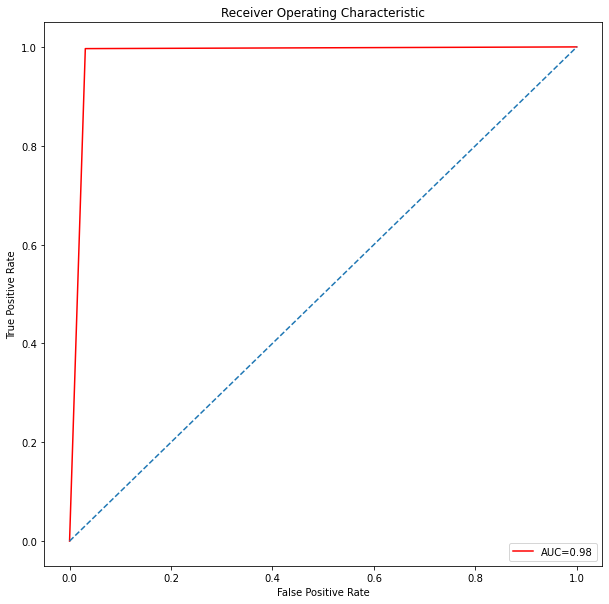

In [49]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [50]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall   : %.3f' % recall_score(y_test, y_pred))
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score : %.3f' % f1_score(y_test, y_pred))

Precision: 0.983
Recall   : 0.997
Accuracy : 0.987
F1 Score : 0.990


# 7. SVM (SVC dans notre cas)
- SVM : Support Vector Machine
- SVC : Support Vector Classifier(dans notre cas)
    - Version la plus simple : LinearSVC (cf.imports)

## 7.1 SVC

In [51]:
estimator = LinearSVC()
estimator.fit(X_train, y_train)

LinearSVC()

In [52]:
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

### 7.2 Matrice de confusion 

In [53]:
score(estimator)
confusion(y_test,y_pred)

Score train : 0.9914 score test : 0.9889


,pred_0,pred_1
test_0,158,3
test_1,2,287


### 7.3Courbe ROC, précision, rappel

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9872230222012077

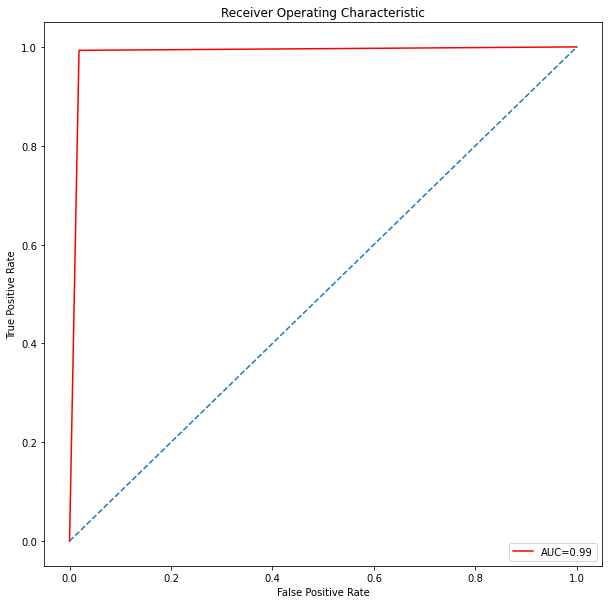

In [55]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [56]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall   : %.3f' % recall_score(y_test, y_pred))
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score : %.3f' % f1_score(y_test, y_pred))

Precision: 0.990
Recall   : 0.993
Accuracy : 0.989
F1 Score : 0.991


# 8. Finding Hyper-parameters

### 8.1 Logistic Regression

In [57]:
estimator = LogisticRegression()

params = { 
    'C' : np.logspace(-3,3,7) ,
    'penalty' : ['l1','l2'],
    'solver' : ['newton-cg','lbfgs','liblinear']
         }

#### Entrainement par validation croisée

In [58]:
grid = GridSearchCV(estimator,
                    params,
                    cv=10, # nb folds
                    n_jobs=-1, #cpu
                    return_train_score=True,
                    verbose=1)
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             return_train_score=True, verbose=1)

# Meilleurs hyper - paramètres

In [59]:
best_params = grid.best_params_
best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
res = grid.cv_results_
res = pd.DataFrame(res)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001100,0.000300,0.000000,0.000000,0.001,l1,newton-cg,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001201,0.000601,0.000000,0.000000,0.001,l1,lbfgs,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003299,0.000899,0.001300,0.000457,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.314286,0.323810,...,0.322751,0.322751,0.322751,0.322751,0.322751,0.322751,0.322751,0.322751,0.322857,0.000317
3,0.031917,0.011940,0.001799,0.001660,0.001,l2,newton-cg,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.885714,0.885714,...,0.867725,0.864550,0.863492,0.865608,0.864550,0.866667,0.864550,0.870899,0.865714,0.002087
4,0.013431,0.003572,0.001616,0.001192,0.001,l2,lbfgs,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.885714,0.885714,...,0.867725,0.864550,0.863492,0.865608,0.864550,0.866667,0.864550,0.870899,0.865714,0.002087
5,0.006201,0.009968,0.001499,0.001500,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.990476,0.980952,...,0.984127,0.985185,0.986243,0.987302,0.985185,0.988360,0.985185,0.984127,0.985397,0.001481
6,0.001900,0.002428,0.000000,0.000000,0.01,l1,newton-cg,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000900,0.000300,0.000000,0.000000,0.01,l1,lbfgs,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.003701,0.000460,0.001100,0.000301,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.990476,0.990476,...,0.984127,0.985185,0.984127,0.988360,0.986243,0.985185,0.986243,0.985185,0.985291,0.001292
9,0.025200,0.004791,0.001700,0.002147,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.980952,0.990476,...,0.979894,0.983069,0.980952,0.983069,0.982011,0.980952,0.982011,0.984127,0.982116,0.001202


In [61]:
# on supprime les colonne qui contiennent le mot "split"
cols = [i for i in res.columns if "split" not in i]
cols

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_penalty',
 'param_solver',
 'params',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'mean_train_score',
 'std_train_score']

In [62]:
res = res[cols]
res = res.sort_values("rank_test_score")
res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
14,0.006500,0.005066,0.001900,0.001513,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.992381,0.007127,1,0.992381,0.000792
20,0.004501,0.002579,0.001199,0.000400,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.991429,0.006667,2,0.992381,0.000792
23,0.004319,0.000779,0.001100,0.000300,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.991429,0.006667,2,0.992275,0.000826
21,0.022527,0.003368,0.001000,0.000002,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.990476,0.007377,4,0.992063,0.000853
22,0.015545,0.003471,0.001186,0.000819,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.990476,0.007377,4,0.992063,0.000853


In [63]:
# Création d'un fonction resultize
def resultize(grid):
    """ make a fancy df frm grid.cv_results"""
    res = grid.cv_results_
    res = pd.DataFrame(res)
    cols = [i for i in res.columns if "split" not in i]
    res = res[cols]
    res = res.sort_values("rank_test_score")
    
    return res

In [64]:
resultize(grid).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
14,0.006500,0.005066,0.001900,0.001513,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.992381,0.007127,1,0.992381,0.000792
20,0.004501,0.002579,0.001199,0.000400,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.991429,0.006667,2,0.992381,0.000792
23,0.004319,0.000779,0.001100,0.000300,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.991429,0.006667,2,0.992275,0.000826
21,0.022527,0.003368,0.001000,0.000002,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.990476,0.007377,4,0.992063,0.000853
22,0.015545,0.003471,0.001186,0.000819,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.990476,0.007377,4,0.992063,0.000853


- **Le plus élevé est à mean_test_score : 0.99**
- On réentraine notre modele avec les meilleurs hyper parametres

##  8.2 Regression Logistique avec hyper Parametres optimisés 

In [65]:
# directement avec best params
estimator = LogisticRegression(**best_params)
estimator

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [66]:
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [67]:
y_prob = estimator.predict_proba(X_test).round(2)
# Vecteur de probabilté d'appartenir à une classe
y_prob

array([[0.95, 0.05],
       [0.97, 0.03],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.85, 0.15],
       [0.03, 0.97],
       [0.9 , 0.1 ],
       [0.04, 0.96],
       [0.07, 0.93],
       [0.95, 0.05],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.92, 0.08],
       [0.91, 0.09],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.95, 0.05],
       [0.87, 0.13],
       [0.3 , 0.7 ],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.03, 0.97],
       [0.47, 0.53],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.56, 0.44],
       [0.97, 0.03],
       [0.17, 0.83],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.05, 0.95],
       [0.24, 0.76],
       [0.85, 0.15],
       [0.06, 0.94],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.89, 0.11],
       [0.03, 0.97],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.12, 0.88],
       [0.02,

### 8.3 Matrice de confusion 

In [68]:
score(estimator)
confusion(y_test,y_pred)

Score train : 0.981 score test : 0.98


,pred_0,pred_1
test_0,152,9
test_1,0,289


### 8.4 Courbe ROC, précision, rappel

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9720496894409938

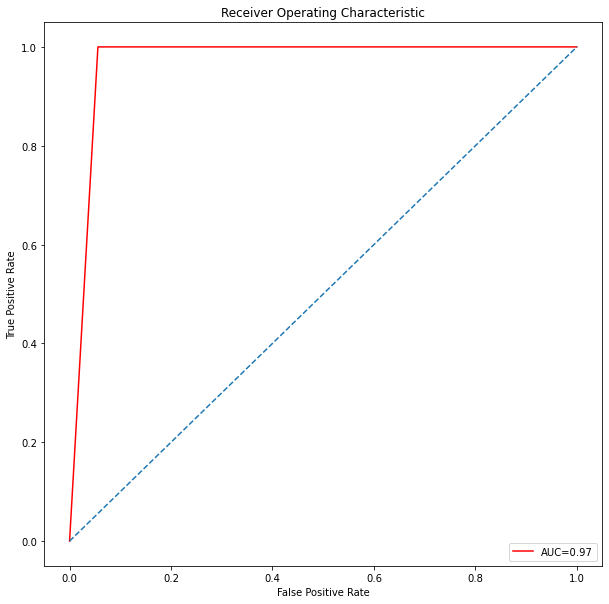

In [70]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--')
plt.axis('tight')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [72]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall   : %.3f' % recall_score(y_test, y_pred))
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score : %.3f' % f1_score(y_test, y_pred))

Precision: 0.9698
Recall   : 1.0000
Accuracy : 0.9800
F1 Score : 0.9847


### Ce modèle est le meilleur : 
- **Tous les scores s'approche de 1 :**
    - **Precision** = TP/(TP+FP)   : **0.970** :  (spécificité)  : ratio de vrai positif 
    - **Recall**    = TP/(TP+FN)   : **1.000** : (Sensibilité)   : ratio de positif prédit comme positif parmi tous les positif
    - **Accuracy**  = TP+TN/total  : **0.980** : (Précision)     : ratio de prédiction juste
    - **F1 score**  = 2(Recall Precision) / (Recall + Precision) :  **0.985** : moyenne pondérée de la sensibilité et de la précision
    - AUC = **0.97**